# NOT FOR TURN IN

Suggestions

- Add legend to plots
- Add discussion of results for each solution


# ME 7160 - Harmonic Balance Project
- Due Date: 12/15
### Contributers


- Admir Makas
- Shashankashekhar Dutta
- Alec Blankenship

# Introduction

*The objective of this study is to utilize **Method of Harmonic Balance** to find a solution of a harmonically excited system.* 

*The procedure involves finding a solution using FFT and comparing it with an analytical numerical solution.*

*Python has been used as the primary software platform for coding the solver routines.*

*Method of Harmonic Balance is one of the perturbation methods which can be used to find a steady-state solution of a harmonic response.*

*The solution is expressed in terms of a Fourier series as:*
$$x = \sum_{m=0}^M A_m\cos(m\omega t+m\beta_0)$$


*The method is utilized by taking Fast Fourier Transforms of the response for sample frequencies.*

*The number of samples can be any value the user wishes.*

*The result is further optimized to minimize the errors and obtain a precise solution.*

*The number of harmonics assumed in the approximation plays a vital role in the accuracy of the solution found by this method. As the number goes up, so does the accuracy. But the computational effort involved may also increase. This is one of the disadvantages of this method*

*There are 4 examples that have been included in this study. The examples have been picked such that a broad area of application of the method of Harmonic Balance can be studied. The problems we looked at consist of one linear case and three non-linear cases. The duffing equation and Van der Pol oscillator models constitute the non-linear models.*

-Application

** *Limitations* **
    -Models over one period at steady state
    
# Harmonic Balance Overview
    


# Solution to linear model

#### Following linear equation was solved as a verification of the method

**$\ddot{x} + \dot{x} + x = cos(2t)sin(5t)$**

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = Acos(2t)cos(5t) + Bsin(2t)sin(5t) + Ccos(2t)sin(5t) + Dsin(2t)cos(5t)$**, where

- A = $\frac{-3785}{171769}$


- B = $\frac{-3274}{171769}$


- C = $\frac{-11164}{171769}$


- D = $\frac{7660}{171769}$

Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 76
         Function evaluations: 7668
         Gradient evaluations: 108
Values of x after optimization:
[-0.02414167 -0.04394116 -0.05832336 -0.0652899  -0.06466735 -0.05798527
 -0.04778018 -0.03660588 -0.02613836 -0.0167187  -0.00749875  0.00288849
  0.01542208  0.02993346  0.04482004  0.05737081  0.06459851  0.06426877
  0.05573289  0.04024025  0.02060366  0.00033727 -0.01741221 -0.03074441
 -0.0393756  -0.04438283 -0.04744964 -0.04993416 -0.05214568 -0.05312785
 -0.05104082 -0.04399163 -0.03097885 -0.01256547  0.00900493  0.03031938
  0.04776075  0.05857577  0.06165251  0.05772452  0.04893874  0.03796749
  0.02701663  0.01711527  0.0079542  -0.00168134 -0.0130776  -0.02671115
 -0.0416944  -0.05579291 -0.06603223 -0.06967603 -0.06520543 -0.05292208
 -0.03493749 -0.01454496  0.00479421  0.02047286  0.03139194  0.03801697
  0.04184266  0.04450205  0.0468926   0.04867971  0.04838331  0

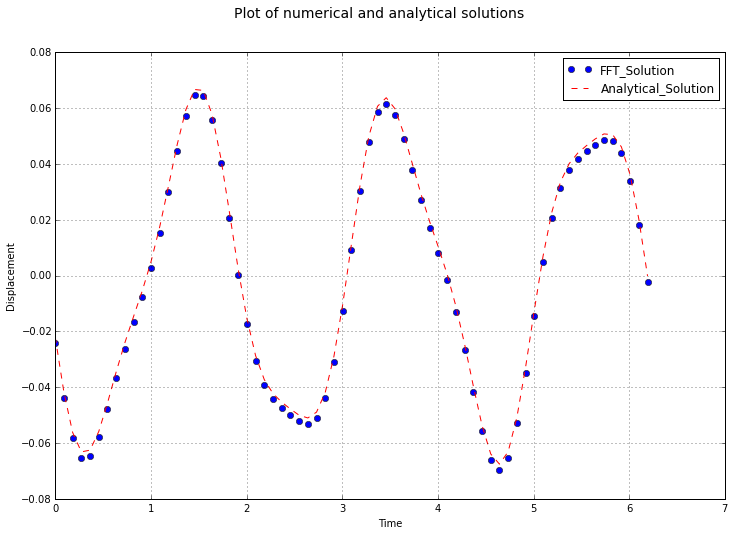

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

A = (-3785/171769)
B = (-3274/171769)
C = (-11164/171769)
D = (7660/171769)

Analytical = (A)*np.cos(2*t)*np.cos(5*t) + (B)*np.sin(2*t)*np.sin(5*t) + (C)*np.cos(2*t)*np.sin(5*t)\
            + (D)*np.sin(2*t)*np.cos(5*t)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot(t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(t, Analytical, 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

# Solution to Duffing Equation with Forcing Term:

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + \dot{x} + x + x^3 = cos(2t)sin(5t)$**



         Current function value: 0.000014
         Iterations: 63
         Function evaluations: 4857
         Gradient evaluations: 95
Values of x after optimization:
[-0.02255249 -0.04903161 -0.06301571 -0.06202794 -0.05017431 -0.03455993
 -0.02020419 -0.00724623  0.00759979  0.02666396  0.04759143  0.06336094
  0.06629438  0.05322584  0.02802555 -0.00044328 -0.02352094 -0.03740381
 -0.04402469 -0.04778759 -0.0508794  -0.05088946 -0.04263725 -0.0228301
  0.00606796  0.03587193  0.05685394  0.06320924  0.05596717  0.04136644
  0.02604164  0.01266435 -0.00077202 -0.01767541 -0.03831204 -0.05770622
 -0.06784225 -0.06273754 -0.04270714 -0.01464145  0.01198624  0.03054858
  0.04029216  0.04497258  0.04840568  0.05052145  0.0470494   0.03312612
  0.0080508 ]


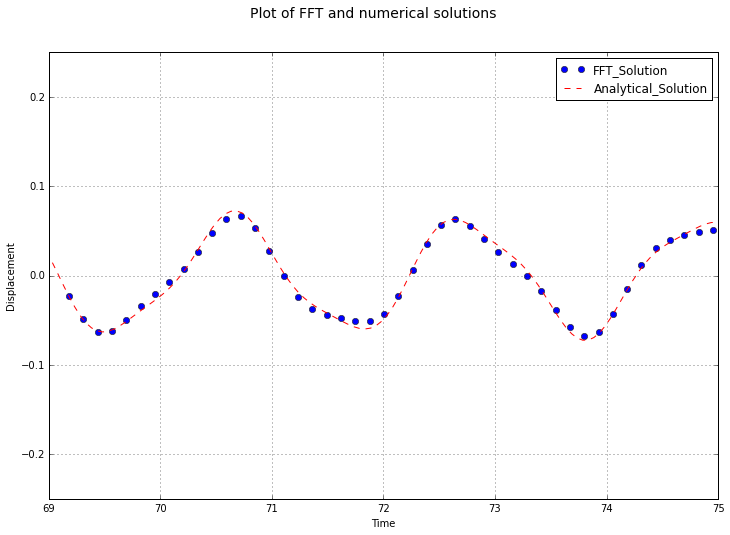

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t = t[0:-1]


x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x + x**3 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution for comparison
from scipy.integrate import odeint

def deriv(x, t):
    return np.array([x[1], -0.25*x[1] - x[0] - x[0]**3 + np.cos(2*t)*np.sin(5*t)])

time = np.linspace(0.0, 100, 2000)
xinit=np.array([0,0])
x = odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((22.022*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:, 0], 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([69, 75, -0.25, 0.25])
plt.grid()
plt.show()

# Solution to Van der Pol oscilator #1:

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + (x^2 - 1)\dot{x} + x = cos(t)sin(4t)$**

         Current function value: 0.649413
         Iterations: 115
         Function evaluations: 7612
         Gradient evaluations: 152
Values of x after optimization:
[ 1.06970112  1.35295167  1.59142909  1.77325209  1.89616272  1.96508113
  1.98796848  1.9731277   1.92833003  1.86071834  1.77661051  1.68094086
  1.57653778  1.46362033  1.33985189  1.20106009  1.04241962  0.85968882
  0.65009957  0.41272972  0.14850234 -0.13973362 -0.44648537 -0.76207489
 -1.07127293 -1.35445989 -1.59273798 -1.77428812 -1.8969252  -1.96561696
 -1.98833822 -1.97338676 -1.9285216  -1.8608739  -1.77675218 -1.68108506
 -1.57669788 -1.46380802 -1.34007866 -1.20133875 -1.04276544 -0.86012189
 -0.65064597 -0.41342088 -0.14937427  0.13864851  0.44517755  0.76058425]


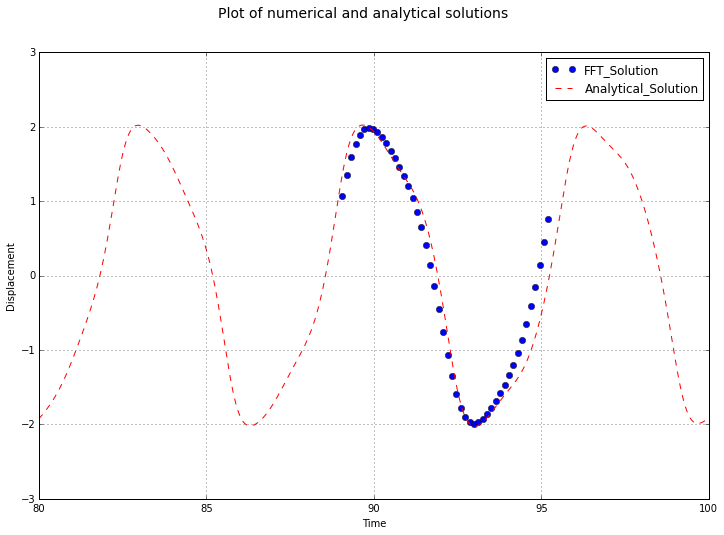

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 49 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1

#x0=1.5*np.ones(N-1)
#x0=1.48*np.cos(1*t)
x0=3.0*np.sin(4*t)*np.cos(1*t)

f = F*np.cos(1*t)*np.sin(4*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos(1*t)*np.sin(4*t)])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((28.35*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([80, 100, -3, 3])
plt.grid()
plt.show()

# Solution to Van der Pol oscilator #2

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$**

         Current function value: 0.144051
         Iterations: 312
         Function evaluations: 19341
         Gradient evaluations: 379
Values of x after optimization:
[-1.78687104 -1.65209297 -1.4993302  -1.34705814 -1.21051013 -1.09226527
 -0.97814623 -0.8431553  -0.66329703 -0.42680051 -0.13839025  0.18357561
  0.51551766  0.83832258  1.14266694  1.42452857  1.67475416  1.87451468
  2.00364262  2.05397322  2.03506862  1.97049674  1.88908987  1.8150372
  1.758792    1.7132919   1.65885992  1.57535676  1.45375648  1.30054005
  1.13333884  0.97094112  0.82202471  0.67832422  0.5167022   0.30981162
  0.03972019 -0.29168032 -0.65879988 -1.01833946 -1.32789935 -1.56761351
 -1.74456756 -1.87590856 -1.97049699 -2.02384455 -2.02767473 -1.98044879
 -1.89468489]


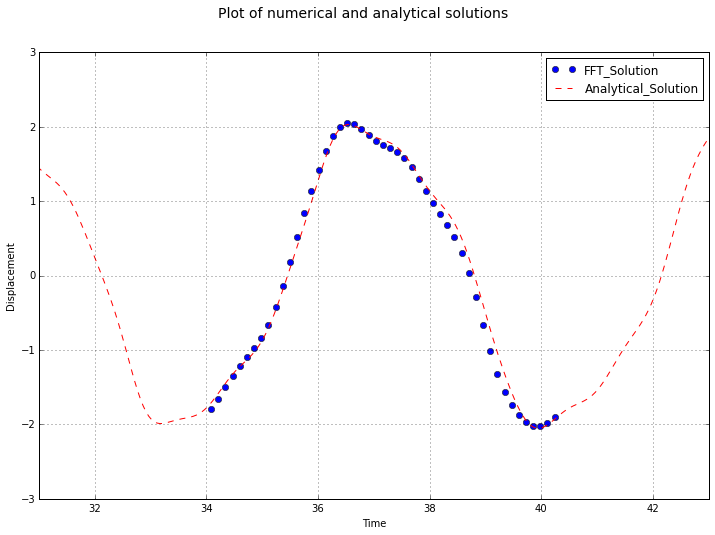

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 2

#x0=1*np.ones(N-1)
x0=1*np.cos((2*np.pi*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.cos((2*np.pi*t))
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos((2*np.pi*t))])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2.0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((10.85*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([31, 43, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. 
### Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + 
A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + 
A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) +  A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$, $A_5$, $A_6$, $A_7$, $A_8$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting


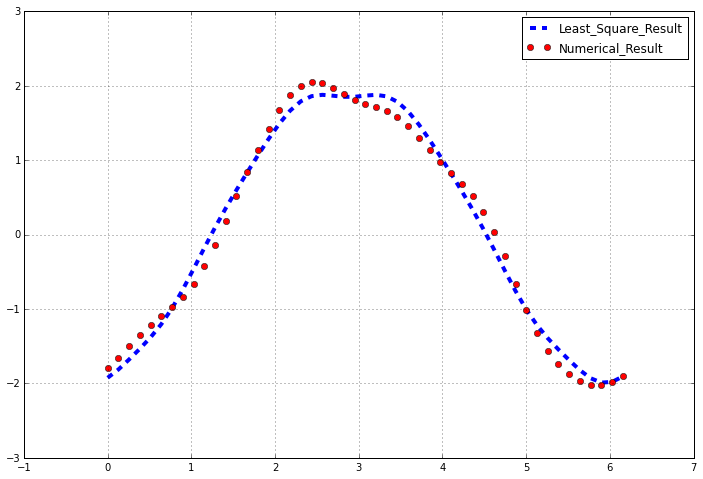

Coefficient values listed below
[ 0.11733676 -1.97114563 -0.1144238   0.03872244 -0.03382009  0.01570065
 -0.03626051 -0.00505717 -0.00491391  1.02487333  0.18922503]


In [24]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4, label = 'Least_Square_Result')
plt.plot(t, sol.x, 'ro', label = 'Numerical_Result')
plt.legend(loc = 'upper right')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation can be seen below:


In [18]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans            

         ⎛51⋅t    19⎞         ⎛51⋅t   19⎞      ⎛153⋅t    57⎞        ⎛102⋅t   1
  197⋅cos⎜──── + ───⎟   11⋅cos⎜──── + ──⎟   cos⎜───── + ───⎟   3⋅cos⎜───── + ─
         ⎝ 50    100⎠         ⎝ 25    50⎠      ⎝  50    100⎠        ⎝  25    2
- ─────────────────── - ───────────────── + ──────────────── - ───────────────
          100                  100                 25                 100     

9⎞      ⎛51⋅t   19⎞      ⎛153⋅t   57⎞     
─⎟   cos⎜──── + ──⎟   cos⎜───── + ──⎟     
5⎠      ⎝ 10    20⎠      ⎝  25    50⎠   3 
── + ────────────── - ─────────────── + ──
           50                25         25


# Conclusions and discussion